
Attribute Information:
Bank client data:

    Age (numeric)
    Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
    Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
    Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

    Contact: contact communication type (categorical: 'cellular','telephone')
    Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

    Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    Previous: number of contacts performed before this campaign and for this client (numeric)
    Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

    Emp.var.rate: employment variation rate - quarterly indicator (numeric)
    Cons.price.idx: consumer price index - monthly indicator (numeric)
    Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    Euribor3m: euribor 3 month rate - daily indicator (numeric)
    Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

    y - has the client subscribed a term deposit? (binary: 'yes', 'no')



# Importing Data Analysis Librarys

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [186]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Datasets\ML dataset\DT\bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [187]:
df.shape

(45211, 17)

In [188]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [189]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical 

In [191]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


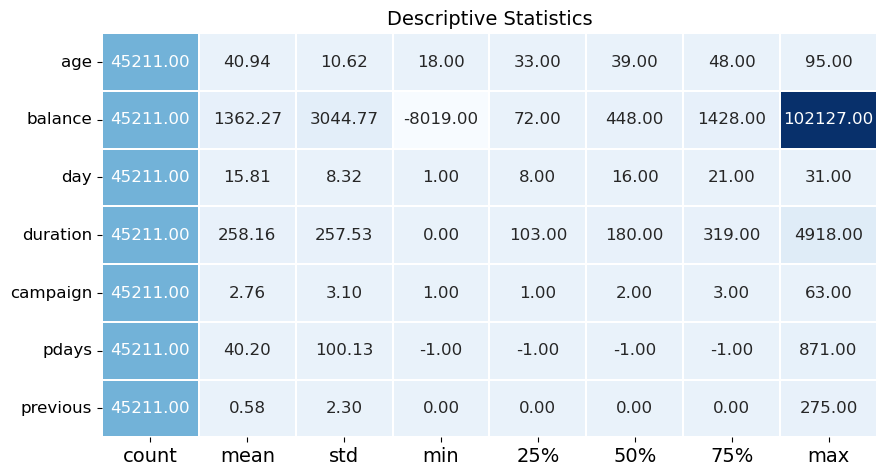

In [192]:
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

# Checking null value

In [193]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [194]:
# Calculate the count of 'unknown' and 'other' in the 'poutcome' column
unknown_count = (df['poutcome'] == 'unknown').sum()
other_count = (df['poutcome'] == 'other').sum()

# Calculate the total count of values in the 'poutcome' column
total_count = len(df)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown = (unknown_count / total_count) * 100
percentage_other = (other_count / total_count) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown)
print("Percentage of 'other' in poutcome:", percentage_other)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [195]:
# Drop the 'poutcome' column from the dataset
data = df.drop(columns=['poutcome'])

In [196]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: contact, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [197]:
#  So we will Drop the row with index 4
data = data.drop(4)

# Handling Outliers

<Axes: >

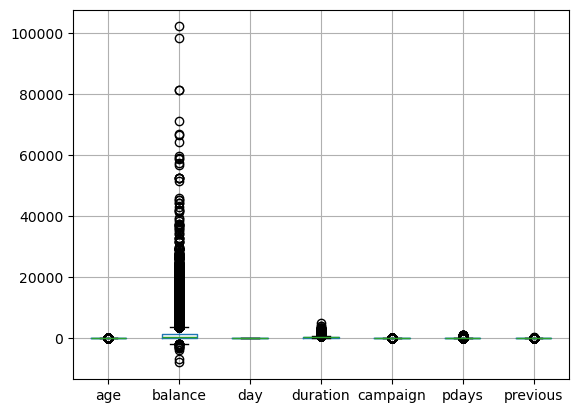

In [198]:
data.boxplot()

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

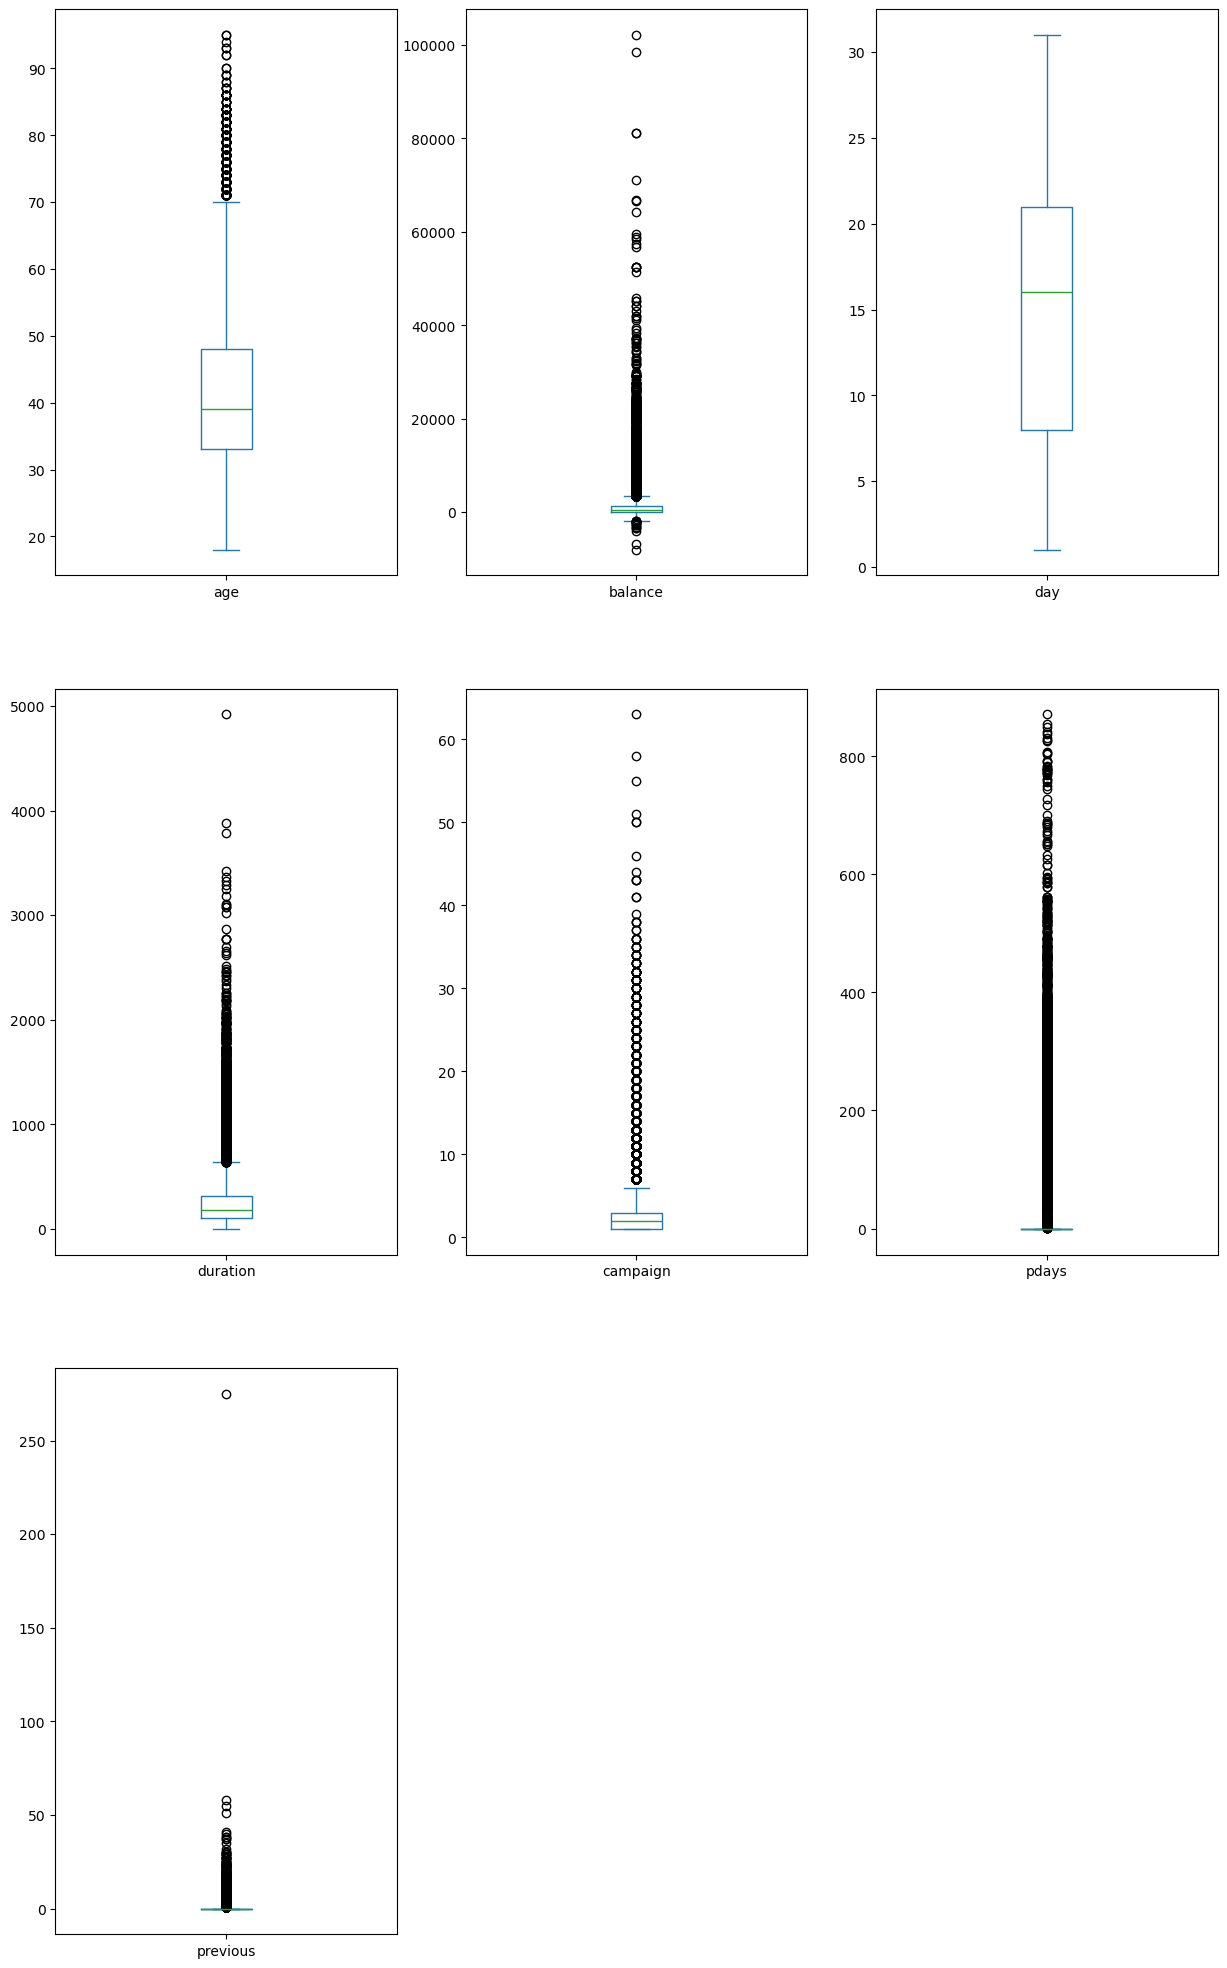

In [199]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

# Calculate the outliers using IQR Method:

In [200]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

In [201]:
data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

In [202]:
Q1 = data['campaign'].quantile(0.10)
Q3 = data['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]

data = data[(data['campaign'] >= lower_bound) & (data['campaign'] <= upper_bound)]

In [203]:
Q1 = data['duration'].quantile(0.20)
Q3 = data['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]

data = data[(data['duration'] >= lower_bound) & (data['duration'] <= upper_bound)]

In [204]:
Q1 = data['previous'].quantile(0.05)
Q3 = data['previous'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]

data = data[(data['previous'] >= lower_bound) & (data['previous'] <= upper_bound)]

In [205]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

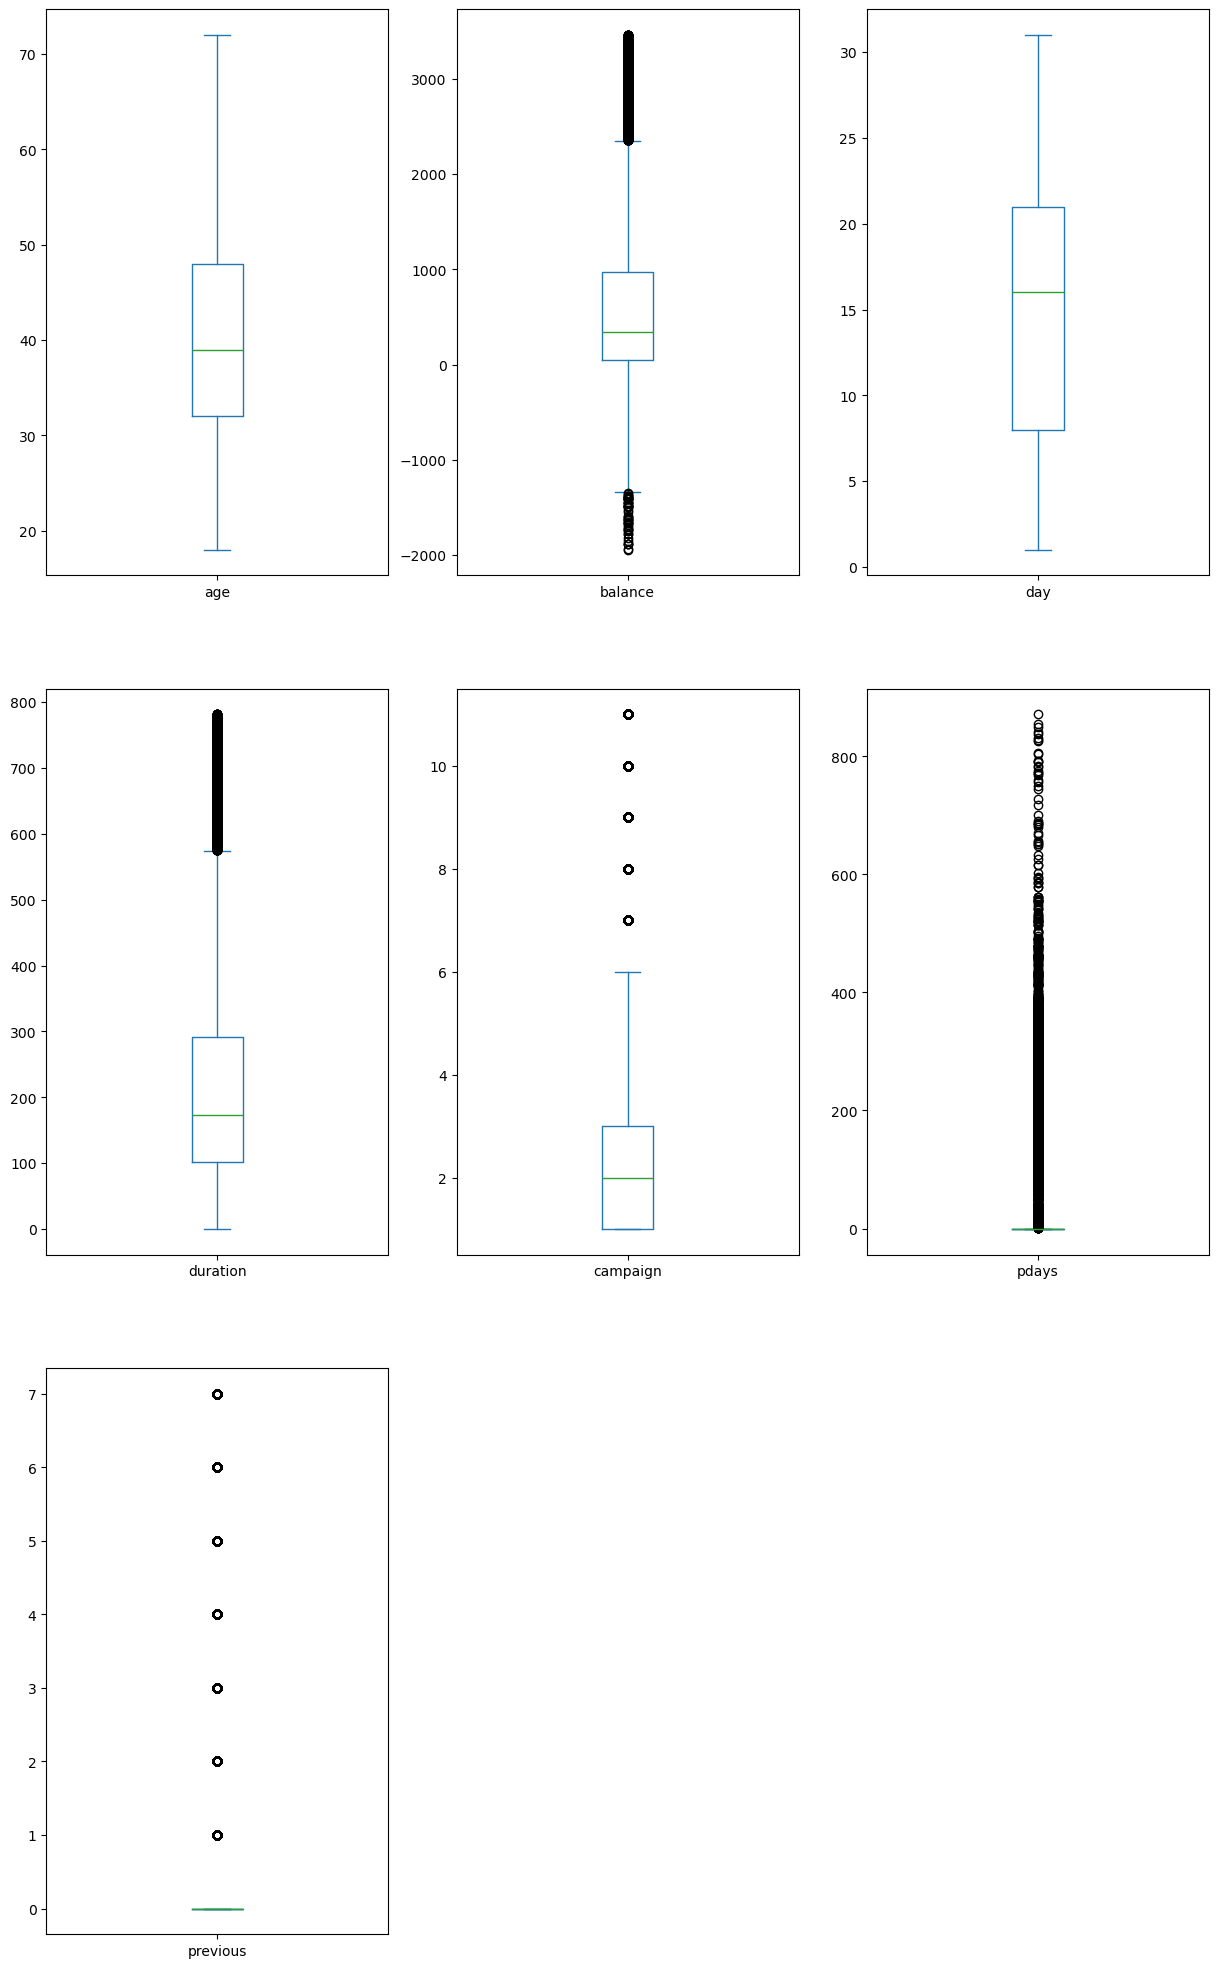

In [206]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

<Axes: >

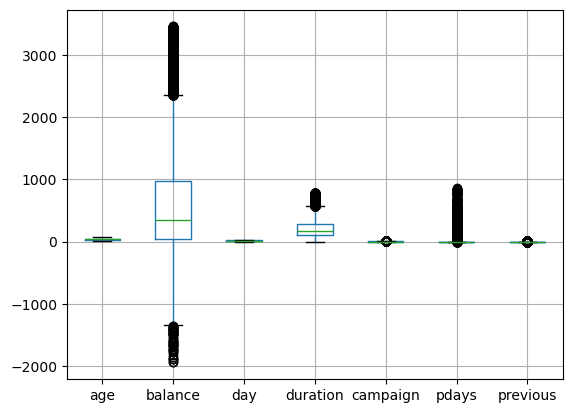

In [207]:
data.boxplot()

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37058 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        37058 non-null  int64 
 1   job        37058 non-null  object
 2   marital    37058 non-null  object
 3   education  37058 non-null  object
 4   default    37058 non-null  object
 5   balance    37058 non-null  int64 
 6   housing    37058 non-null  object
 7   loan       37058 non-null  object
 8   contact    37058 non-null  object
 9   day        37058 non-null  int64 
 10  month      37058 non-null  object
 11  duration   37058 non-null  int64 
 12  campaign   37058 non-null  int64 
 13  pdays      37058 non-null  int64 
 14  previous   37058 non-null  int64 
 15  y          37058 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.8+ MB


In [209]:
df.shape

(45211, 17)

# EDA 

Q1: How does job affect loan?

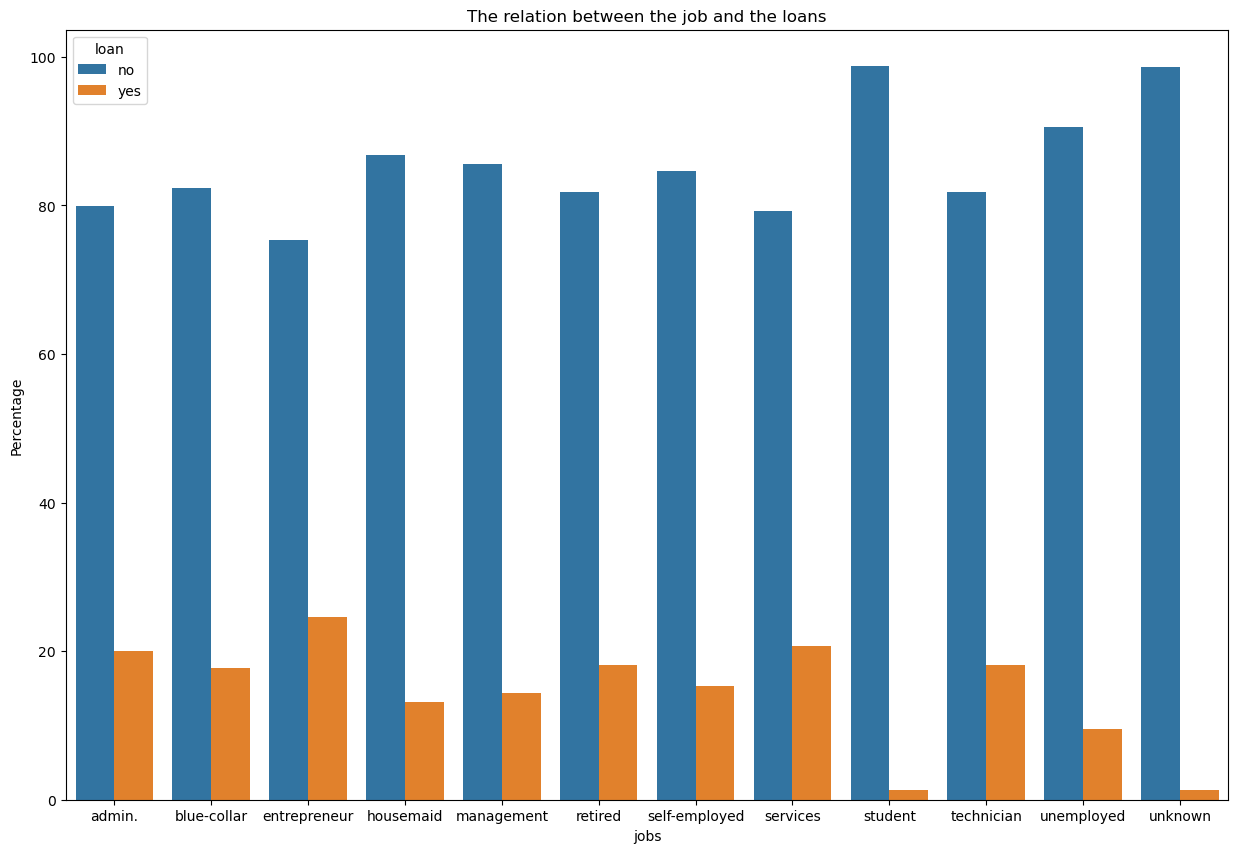

In [210]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

Q2: Which contact method is more effective in terms of percuading customers to subscribe?

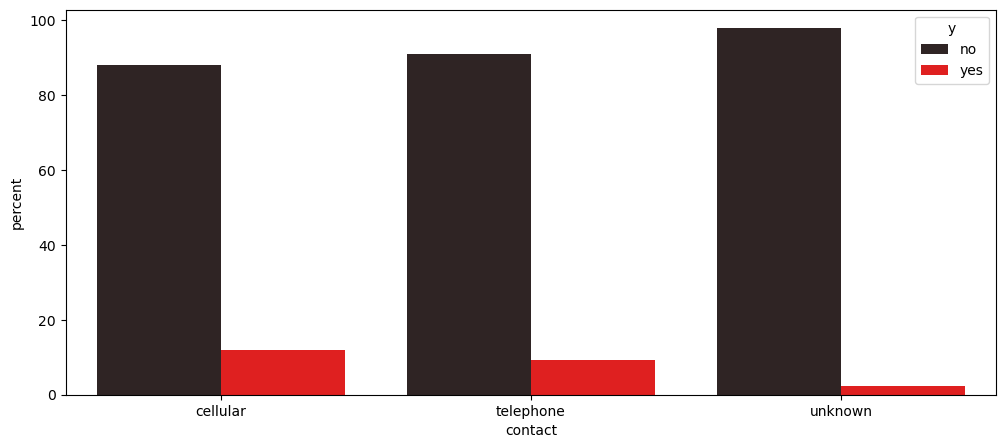

In [211]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages, color='red')

plt.show()

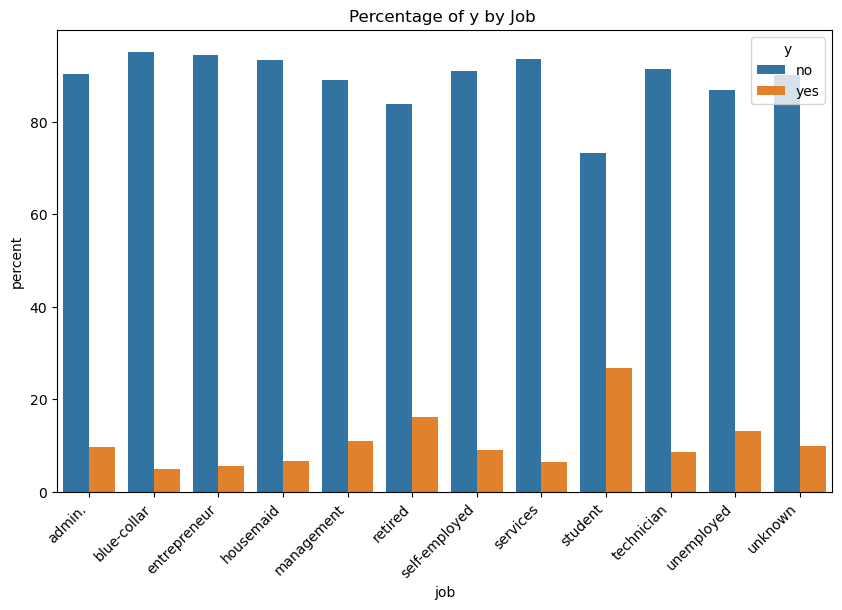

In [212]:
colors = ['#FFB90F', '#33FFA8']
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

Q4: How does Marital status affect Y?

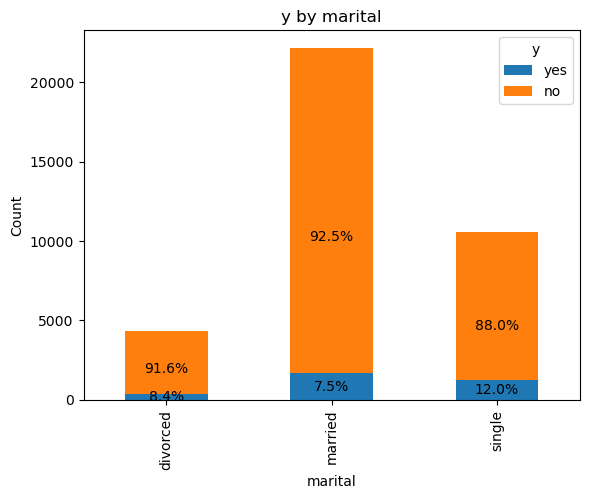

In [213]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

Q5: How does duration affect Y?

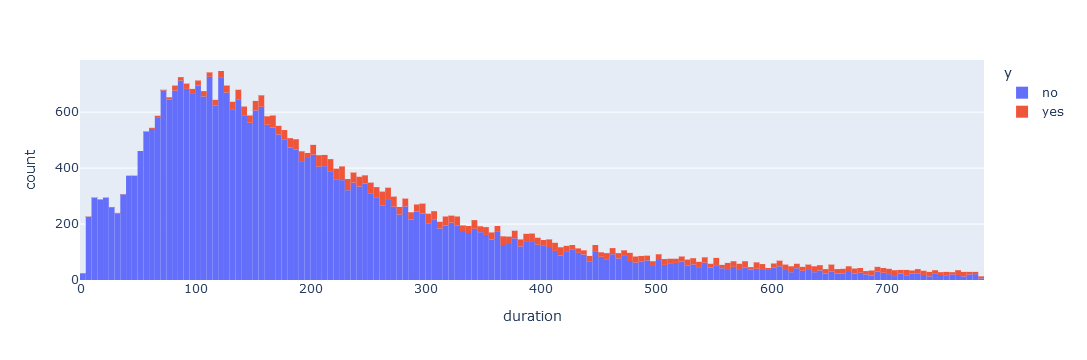

In [214]:
import plotly.express as px
fig = px.histogram(data,x='duration',color='y')
fig.show()

Q6: How does financial status influence subscription decisions?

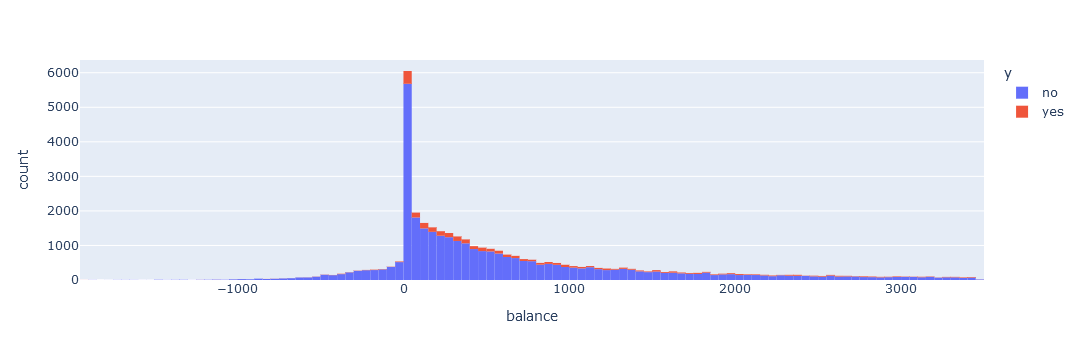

In [215]:
fig = px.histogram(data,x='balance',color='y')
fig.show()

Q7: How does age affect Y?

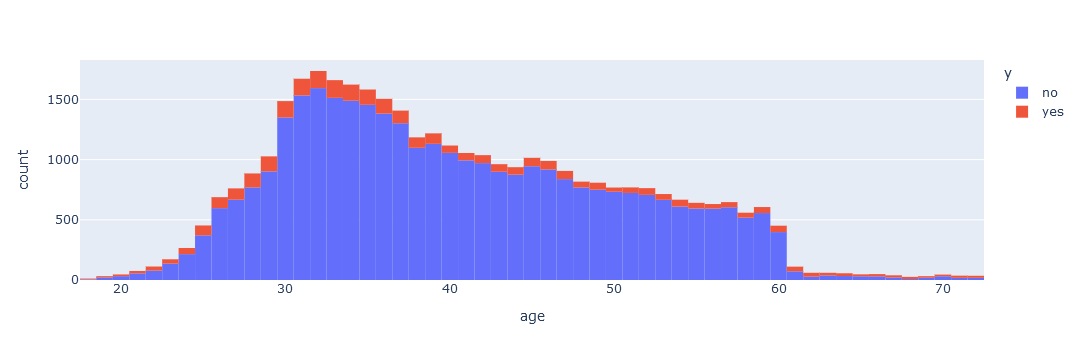

In [216]:
fig = px.histogram(data,x='age',color='y')
fig.show()

Q8: How does housing loans affect Y?

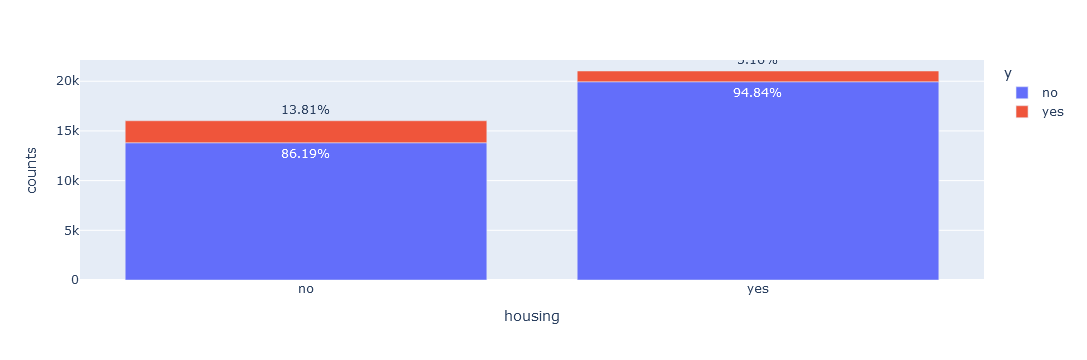

In [217]:
# Calculate the counts for each group
grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')

# Calculate the percentages for each group
percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)

# Assign the percentages to a new column in grouped_df
grouped_df['percentages'] = percentages

# Create the bar chart
fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))

fig.show()

Q9: What are the key customer segments based on demographic (education) with subscription?

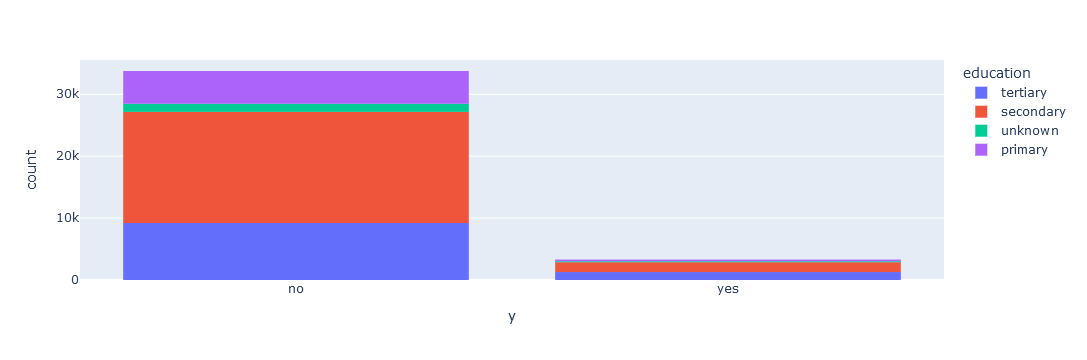

In [218]:
fig = px.histogram(data, x="y",color = 'education')
fig.show()

Q10: How does default affect Y?

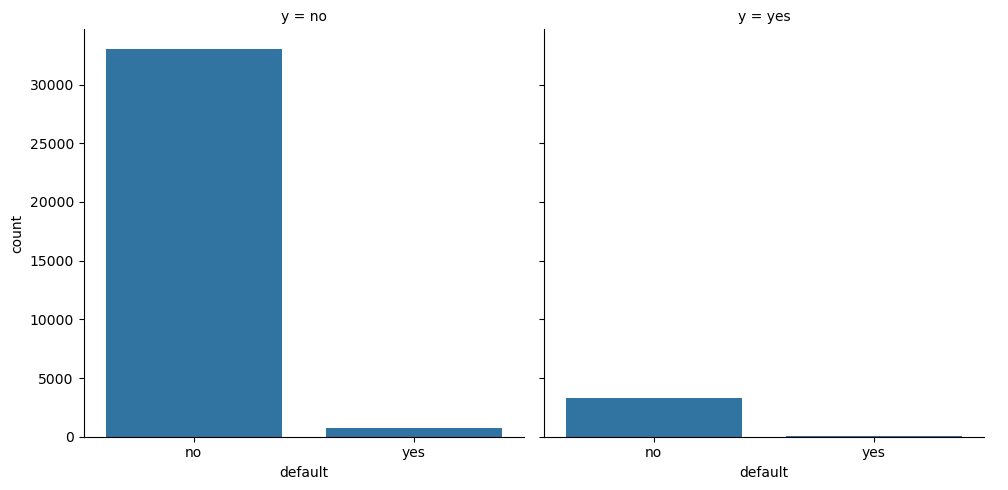

In [219]:
sns.catplot(data=data , x="default" , col="y",kind='count')

Conclusion:

Q1: Students have a lower probability to take a personal loan, while technical and business jobs such as entrepreneurs , technicians, and managers tend ro have personal loans

Q2: Cellular is generally more favorable in terms of persuading customers to subscribing to a term deposit

Q3: Students are much more likely to subscribe to a term deposit than any other field

Q4: Single customers are more inclined to use a term deposit, despite having a lower count than married customers

Q5: The longer the duration to persuade a customer, the more likely it is for the customer to subscribe to a term deposit

Q6: Customers with a balance between 0 and 1000 are more likely to use a term deposit

Q7: Younger demographic (age less than 50-60) have a higher chance to subscribe to a term deposit

Q8: Customers with no housing loans are more inclined to use a term deposit

Q9: Customers with a Secondary education are much more likely to use a term deposit

Q10: Customers who have credit in default usually are not subscribed to a term deposit


In [220]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes


In [221]:
cat_features = data.select_dtypes(include=['object', 'bool']).columns.values
print(cat_features)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'y']


In [222]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

In [223]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column to numerical values
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])

In [224]:
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

In [225]:
data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])

In [226]:
pd.set_option('display.max_columns', None)

In [227]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
1,44,1,29,5,8,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False
2,33,1,2,5,8,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True
3,47,3,1506,5,8,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
5,35,2,231,5,8,139,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False


In [228]:
# Drop columns related to the 'unknown' category
unknown_columns = ['job_unknown', 'contact_unknown']

data_encoded.drop(unknown_columns, axis=1, inplace=True)

In [229]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
1,44,1,29,5,8,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False
2,33,1,2,5,8,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True
3,47,3,1506,5,8,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
5,35,2,231,5,8,139,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False,False,True
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False


In [230]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37058 entries, 0 to 45209
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                37058 non-null  int64
 1   education          37058 non-null  int32
 2   balance            37058 non-null  int64
 3   day                37058 non-null  int64
 4   month              37058 non-null  int32
 5   duration           37058 non-null  int64
 6   campaign           37058 non-null  int64
 7   pdays              37058 non-null  int64
 8   previous           37058 non-null  int64
 9   y                  37058 non-null  int32
 10  job_admin.         37058 non-null  bool 
 11  job_blue-collar    37058 non-null  bool 
 12  job_entrepreneur   37058 non-null  bool 
 13  job_housemaid      37058 non-null  bool 
 14  job_management     37058 non-null  bool 
 15  job_retired        37058 non-null  bool 
 16  job_self-employed  37058 non-null  bool 
 17  job_services     

In [231]:
data_encoded.shape

(37058, 32)

# Splitting Data

In [232]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop(columns=['y'])
Y = data_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [233]:
print(X.shape)
print(Y.shape)

(37058, 31)
(37058,)


# Sampling of data

In [234]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (data['y'] == 'yes').sum()
no_count = (data['y'] == 'no').sum()

# Calculate the total count of values in the 'y' column
total_count = len(data)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

before sampling
Percentage of 'yes' in 'y': 8.902261320092828
Percentage of 'no' in 'y': 91.09773867990717


In [235]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [236]:
# Concatenate the resampled 'X' and 'y' to form a new DataFrame
resampled_data = pd.concat([X_resampled, pd.Series(Y_resampled, name='y')], axis=1)

After sampling
Percentage of 'yes' in 'y': 50.0
Percentage of 'no' in 'y': 50.0


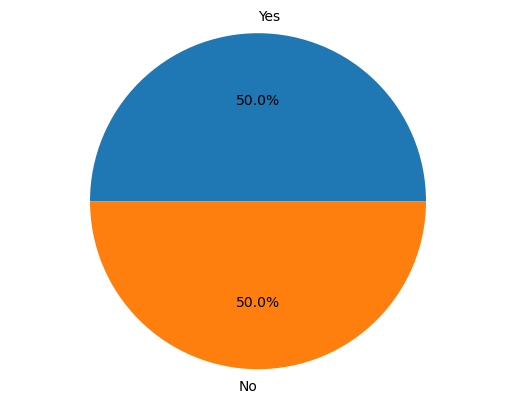

In [237]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (resampled_data['y'] == 1).sum()
no_count = (resampled_data['y'] == 0).sum()

# Calculate the total count of values in the 'y' column
total_count = len(resampled_data)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("After sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)


# Create a pie chart
labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# splitting Resampled Data

In [238]:
# Separate features (X) and the target variable (y) from the resampled data
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

1. Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.8646327014218009

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6729
           1       0.86      0.88      0.87      6775

    accuracy                           0.86     13504
   macro avg       0.86      0.86      0.86     13504
weighted avg       0.86      0.86      0.86     13504


Confusion Matrix for Test Set:
[[5736  993]
 [ 835 5940]]


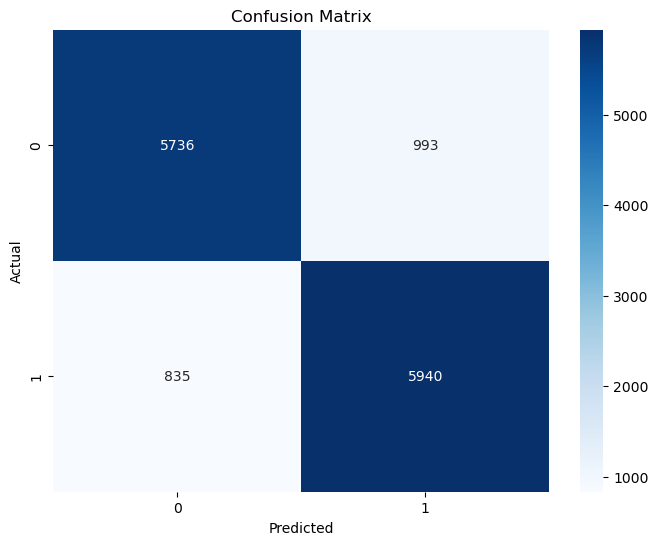

In [240]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use other metrics as needed (e.g., precision, recall, F1-score)
# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Random Forest

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [242]:
Rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
Rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [243]:
y_pred = Rf.predict(X_test)

Training Accuracy: 1.0

Test Accuracy: 0.9598637440758294

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6729
           1       0.97      0.95      0.96      6775

    accuracy                           0.96     13504
   macro avg       0.96      0.96      0.96     13504
weighted avg       0.96      0.96      0.96     13504


Confusion Matrix for Test Set:
[[6547  182]
 [ 360 6415]]


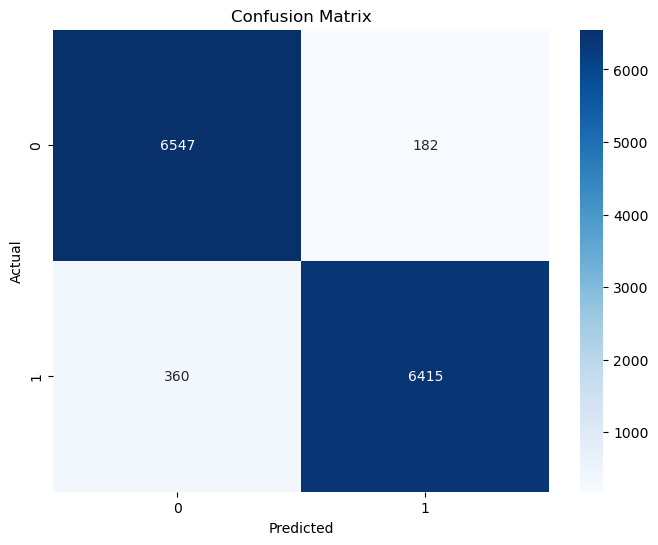

In [244]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = Rf.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = Rf.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

In [245]:
feature_importance = Rf.feature_importances_
# You can associate these scores with feature names for better understanding
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

duration: 0.1977
housing_yes: 0.1242
month: 0.0505
balance: 0.0497
marital_married: 0.0478
pdays: 0.0430
job_blue-collar: 0.0430
housing_no: 0.0408
day: 0.0396
age: 0.0392
loan_yes: 0.0355
campaign: 0.0341
marital_single: 0.0324
job_technician: 0.0298
marital_divorced: 0.0269
previous: 0.0245
job_management: 0.0214
job_services: 0.0202
job_admin.: 0.0192
education: 0.0149
loan_no: 0.0134
contact_cellular: 0.0095
job_self-employed: 0.0068
job_unemployed: 0.0067
job_housemaid: 0.0064
job_entrepreneur: 0.0063
job_retired: 0.0060
contact_telephone: 0.0047
job_student: 0.0035
default_no: 0.0014
default_yes: 0.0008


# Hyperparameter Tuning

In [246]:
"""
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

"""

"\nfrom sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(clf, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n"

Best Parameter

In [247]:
Rf2 = RandomForestClassifier(n_estimators= 200, max_depth =20,min_samples_leaf= 1,min_samples_split=2, random_state=42)

# Train the model
Rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [248]:
y_pred = Rf2.predict(X_test)

Training Accuracy: 0.997000777576184

Test Accuracy: 0.9571978672985783

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6729
           1       0.97      0.95      0.96      6775

    accuracy                           0.96     13504
   macro avg       0.96      0.96      0.96     13504
weighted avg       0.96      0.96      0.96     13504


Confusion Matrix for Test Set:
[[6519  210]
 [ 368 6407]]


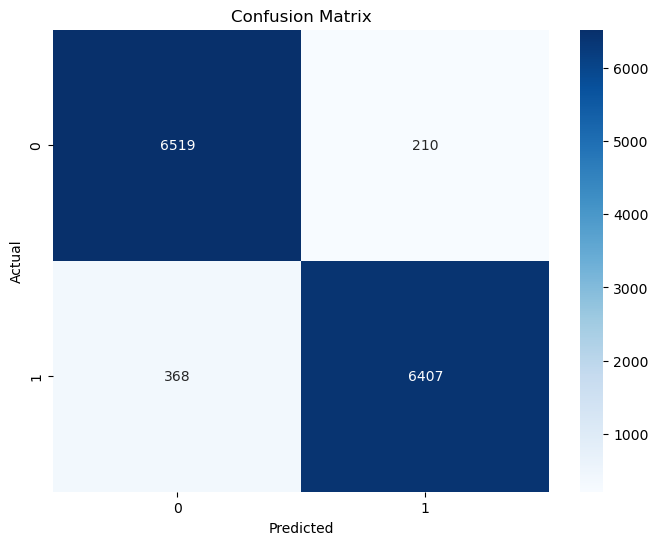

In [249]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = Rf2.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = Rf2.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3.Decision Tree

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [251]:
DT = DecisionTreeClassifier(random_state=42)

# Train the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [252]:
y_pred = DT.predict(X_test)

Training Accuracy: 1.0

Test Accuracy: 0.9268364928909952

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6729
           1       0.92      0.94      0.93      6775

    accuracy                           0.93     13504
   macro avg       0.93      0.93      0.93     13504
weighted avg       0.93      0.93      0.93     13504


Confusion Matrix for Test Set:
[[6164  565]
 [ 423 6352]]


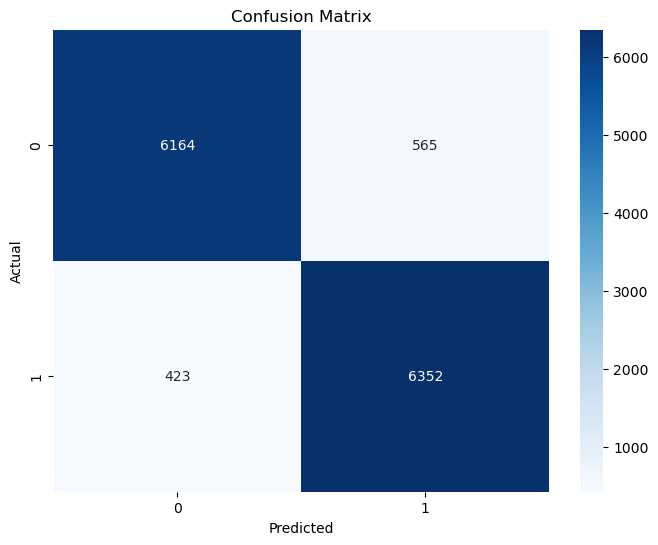

In [253]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = DT.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf3.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [254]:
"""from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
"""

"from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'criterion': ['gini', 'entropy']\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(clf, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n"

In [255]:
#best_params

In [256]:
DT2 = DecisionTreeClassifier(random_state=42 , criterion='gini', max_depth=20 ,min_samples_split= 2)

# Train the model
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [257]:
y_pred = DT2.predict(X_test)

Training Accuracy: 0.9960565779242418

Test Accuracy: 0.9249851895734598

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6729
           1       0.92      0.94      0.93      6775

    accuracy                           0.92     13504
   macro avg       0.93      0.92      0.92     13504
weighted avg       0.93      0.92      0.92     13504


Confusion Matrix for Test Set:
[[6152  577]
 [ 436 6339]]


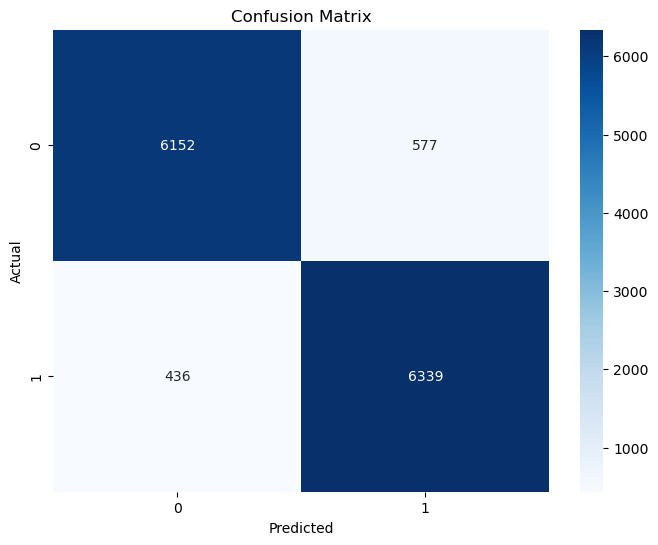

In [258]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = DT2.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = DT2.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4. XGboost

In [259]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [260]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [261]:
# Initialize the XGBoost classifier
XGB = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [262]:
y_pred = XGB.predict(X_test)

Training Accuracy: 0.9774317769467176

Test Accuracy: 0.9575681279620853

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6729
           1       0.97      0.95      0.96      6775

    accuracy                           0.96     13504
   macro avg       0.96      0.96      0.96     13504
weighted avg       0.96      0.96      0.96     13504


Confusion Matrix for Test Set:
[[6506  223]
 [ 350 6425]]


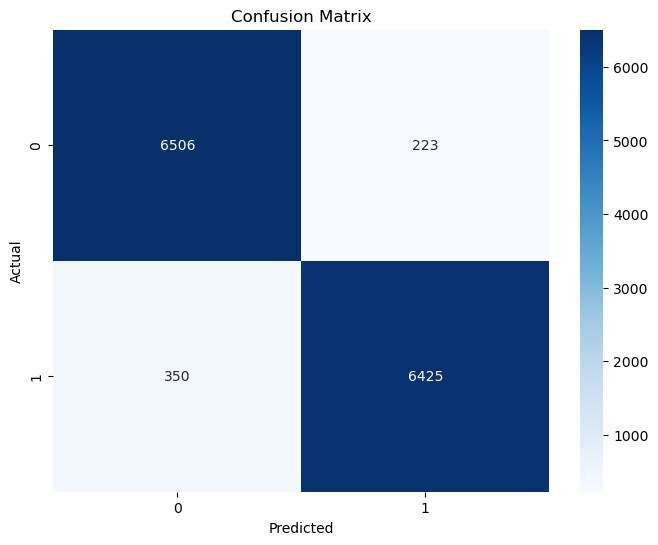

In [263]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = XGB.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf5.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# models = pd.DataFrame({
#                 'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
#                            'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
#                 'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

# models.sort_values(by='Score', ascending=False)